Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022 (4).csv


/tmp/ipython-input-11-188568854.py:14: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=';')
/tmp/ipython-input-11-188568854.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MatchWinner'] = df['MatchWinner'].astype(int)



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.76      0.65      8403
           1       0.57      0.36      0.45      7428

    accuracy                           0.57     15831
   macro avg       0.57      0.56      0.55     15831
weighted avg       0.57      0.57      0.56     15831



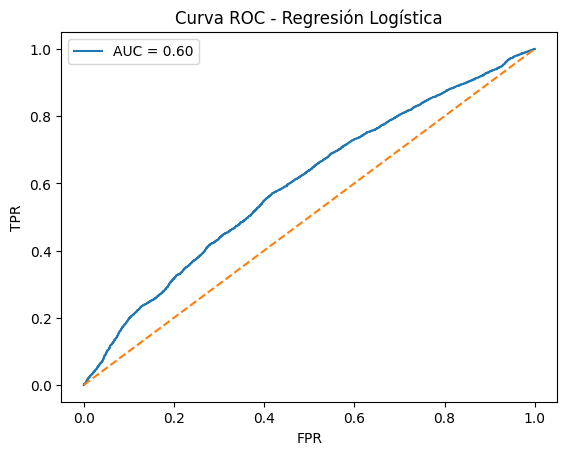

In [11]:
# Clasificación binaria con Regresión Logística

import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. Cargar el dataset desde Colab ---
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep=';')

# --- 2. Preprocesamiento de columnas numéricas ---
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue', 'MatchWinner'])
df['MatchWinner'] = df['MatchWinner'].astype(int)

# --- 3. Selección de variables ---
X = df[['TravelledDistance', 'RoundStartingEquipmentValue']]
y = df['MatchWinner']

# --- 4. División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- 5. Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Cargar el modelo ---
model = LogisticRegression()

# --- 7. Entrenamiento ---
model.fit(X_train_scaled, y_train)

# --- 8. Evaluación ---
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# --- 9. Curva ROC ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.show()


# Conclusión
En este caso, aplicamos regresión logística usando la misma estructura que nos dio buenos resultados con el modelo SVM: mismo dataset, variables seleccionadas y proceso de limpieza. Utilizamos dos columnas clave: la distancia recorrida por el jugador y el valor de su equipo al inicio de la ronda, para predecir si su equipo ganaba o no.

Al mantener el enfoque constante, fue posible comparar de forma justa el desempeño del modelo. Los resultados mostraron una precisión de aproximadamente 57%, y una curva ROC con un AUC cercano a 0.60. Aunque la regresión logística logró detectar ciertos patrones, su capacidad para diferenciar entre los casos positivos y negativos fue limitada.

En conclusión, este modelo sirve como una base simple y clara para comparar con modelos más complejos. Si bien no entrega los mejores resultados, es útil para marcar un punto de partida dentro del análisis comparativo, donde árboles de decisión, random forest o SVM podrían mejorar la capacidad predictiva.